## Make Manhattan plots

Imports.

In [1]:
import matplotlib.pyplot as plt # make simple visualizations
import numpy as np # data management

import io_helpers # file I/O

print(f'''
This notebook adds:
NumPy version {np.__version__}
''')


This I/O helper file uses:
Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)],
Matplotlib version 3.7.1,
pandas version 1.5.3


This notebook adds:
NumPy version 1.24.3



Constant.

In [2]:
geno = io_helpers.read_csv('data', 'genotypes', 'X_WAS_Dkc1_male_top_SNP.csv')
top_snp = geno.columns[1]
top_pos = int(top_snp.replace('X:', ''))

Helper function.

In [3]:
def chr_x_manhattan_plot(sex: str) -> None:
    """Create a Manhattan plot of p-values within X-WAS of a sex."""

    data = io_helpers.read_csv('results', 'associations',
                               f'X_WAS_Dkc1_{sex}.csv')
    data['pos'] = data['SNP'].str.replace('X:', '').astype(int)

    # plot log10-transformed to emphasize small p values
    plt.scatter(data['pos'], -np.log10(data['p']), s=0.5, color='black',
                rasterized=True)
    plt.plot(top_pos, -np.log10(data.loc[data['pos'] == top_pos, 'p']), 
             marker='o', color='blue', linestyle='None', label=top_snp)
    plt.xticks([])

    escaped_title = io_helpers.roman_format(f'expression in {sex} rats')
    plt.title(f'Dkc1 {escaped_title}', style='italic')
    plt.xlabel('Position along chrX')
    plt.ylabel('-log10(pval)')

    plt.legend()
    plt.gcf().set_size_inches(6, 3)

    io_helpers.save_plot(f'X_WAS_Dkc1_{sex}')

Making Manhattan plots.

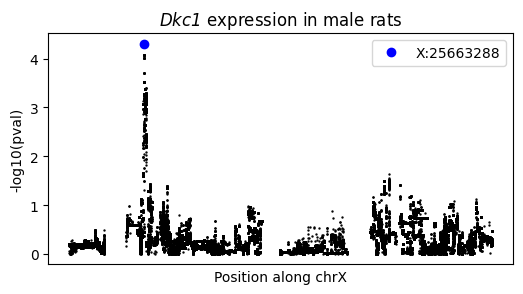

In [4]:
# Figure S12A
chr_x_manhattan_plot('male')

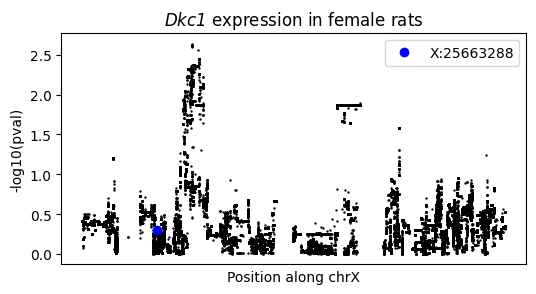

In [5]:
# Figure S12B
chr_x_manhattan_plot('female')